# Tutorial: Fitting and prediction

In this tutorial, we will practice implementing linear regression models in R.

## Goals:
* Learn to use the `lm` function
* Learn to use the `predict` function

This lab draws from the practice sets at the end of Chapter 3 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

--- 
# Simple linear regression with a single predictor

First, we will look at a simple case, where $X$ has only one predictor (i.e., p = 1). For these first examples we will be using the [MASS](https://cran.r-project.org/web/packages/MASS/MASS.pdf) library. 

In [ ]:
# Load the namespace for these packages and attach them to the search list 
library(MASS)
library(ggplot2)

Let's start with some simple linear regression models from the _MASS_ library. In particular, let's use the `Cars93` data set, which records various characteristics for randomly selected 1993 passenger car models. We will want to see how other factors actually predict the price of these cars. 

If you want to visualize the data set first, use the `fix()` function like so. (Note: this won't work in Colab or the Jupyter notebook environment, but will work in RStudio).

In [ ]:
# fix(Cars93)

Let's take a look at all the variables in `Cars93`

In [ ]:
names(Cars93)

[1] "Manufacturer"       "Model"              "Type"              
 [4] "Min.Price"          "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"        "AirBags"           
[10] "DriveTrain"         "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"                "Rev.per.mile"      
[16] "Man.trans.avail"    "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"          "Width"             
[22] "Turn.circle"        "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"             "Make"

You can also also take a look at the description for this data set using the `help()` function or `?` shortcut. This will create a separate window that will give you the relevant information about any data set, libarary, or function in r.

In [ ]:
help(Cars93)
?Cars93

## Model fitting

Now we want to use the built-in `lm` function in r. We already went over this a little bit in the recitation tutorial about model objects. But let's go a bit more in-depth.

First, let's do some basic analysis. 

In [ ]:
# To get more information on the lm function execute this cell
help(lm)

Let's use the built-in `lm` function to look at the relationship between the width of cars (`Width`) and their weight (`Weight`). 
<br>
**Note:** you can use `ggplot2` or the built-in `plot`function for data exploration

As an initial step, we can check whether our dependent variable (`Weight`) is normally distributed, using a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/#:~:text=A%20Q%2DQ%20plot%20is%20a,truly%20come%20from%20Normal%20distributions.). 

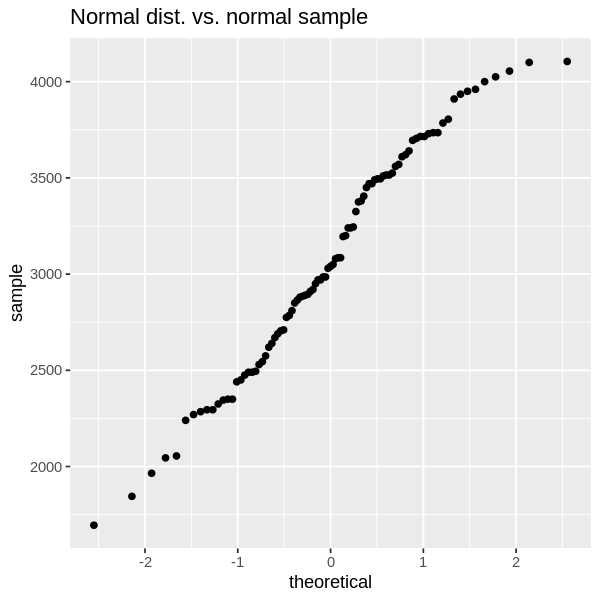

In [ ]:
options(repr.plot.width=5, repr.plot.height=5) # plot size 
ggplot(Cars93, aes(sample=Weight)) + geom_point(stat = "qq") + ggtitle("Normal dist. vs. normal sample")

Since this is a rougly a straight line, we can safely assume that the `Weight` variable is normally distributed. 

We can also take a preliminary look at scatterplots across all pairs of our variables. We can simply do this by using the `pairs` function.

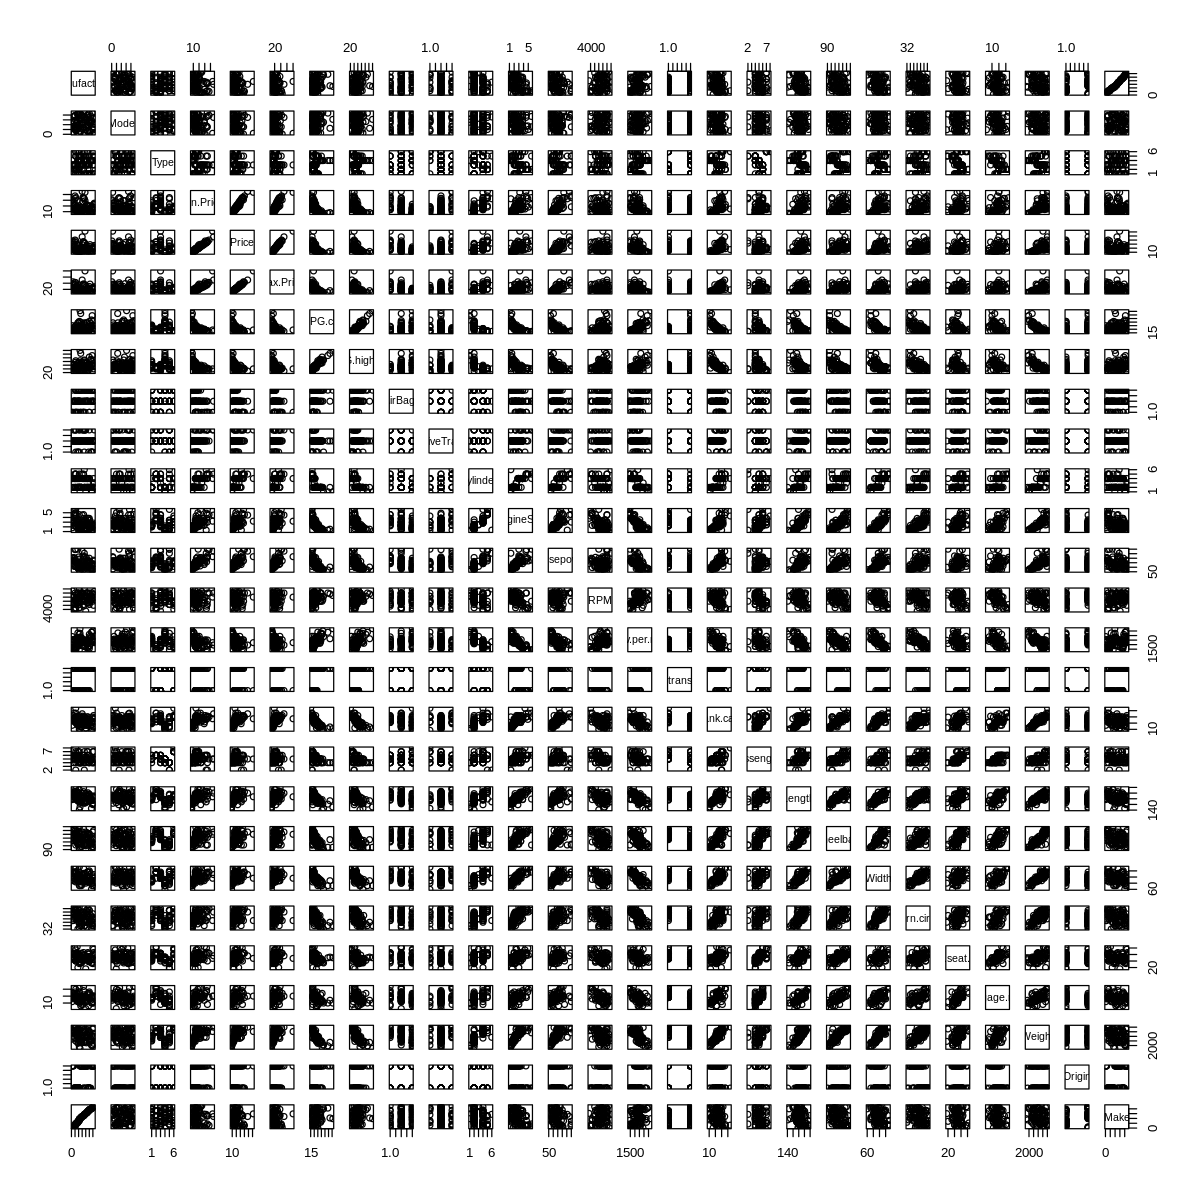

In [ ]:
# install.packages("repr") # uncomment to install repr library
library(repr)
options(repr.plot.width=10, repr.plot.height=10) # plot size reset
pairs(Cars93)

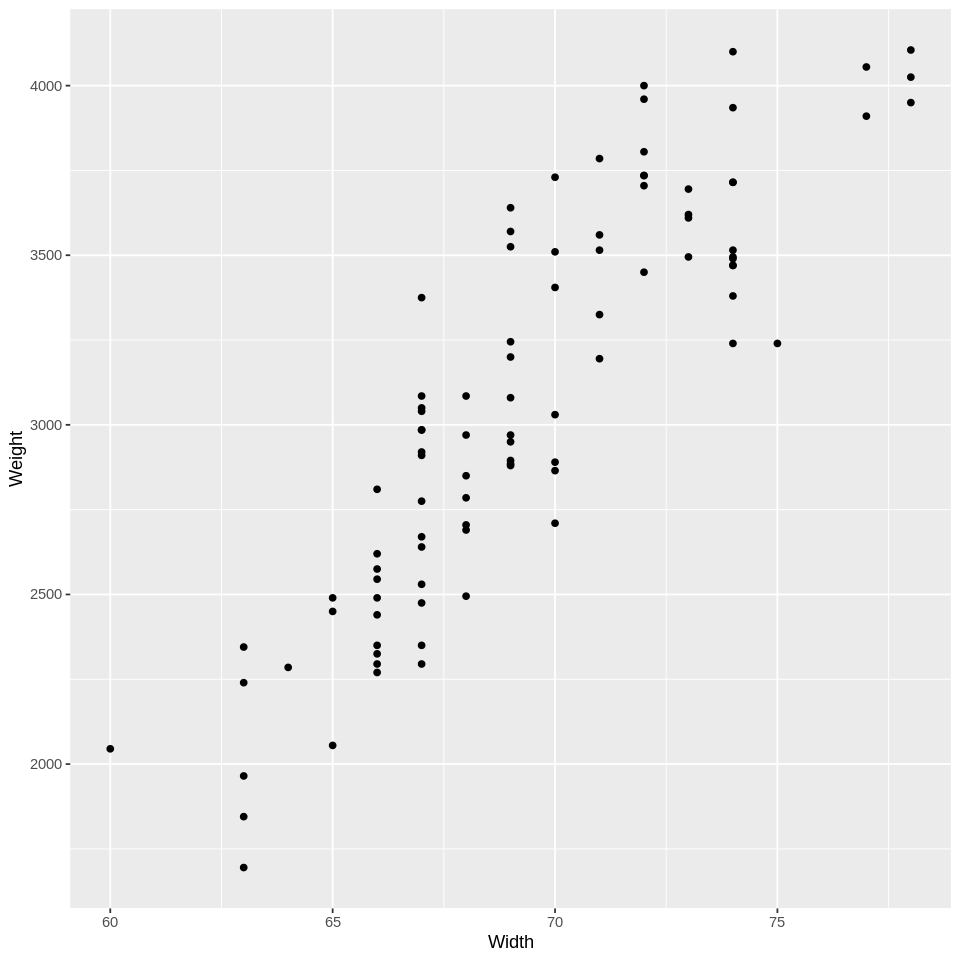

In [ ]:
# Plot the joint distribution
options(repr.plot.width=8, repr.plot.height=8)
ggplot(aes(Width, Weight), data=Cars93) + 
geom_point() + 
xlab('Width') + 
ylab('Weight')

Now let's build a model object using `lm` that captures this simple relationship. Remember that the output from the `lm` function is an object that contains all the information about the model that you trained.

In [ ]:
# Let's try a simple linear model
lm.fit = lm(Weight~Length, data=Cars93)

# In order to see the results, use the summary function
summary(lm.fit)


Call:
lm(formula = Weight ~ Length, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-543.68 -227.54  -87.96  176.89  899.32 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2894.297    460.376  -6.287  1.1e-08 ***
Length         32.571      2.505  13.002  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 350.9 on 91 degrees of freedom
Multiple R-squared:  0.6501,	Adjusted R-squared:  0.6462 
F-statistic: 169.1 on 1 and 91 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



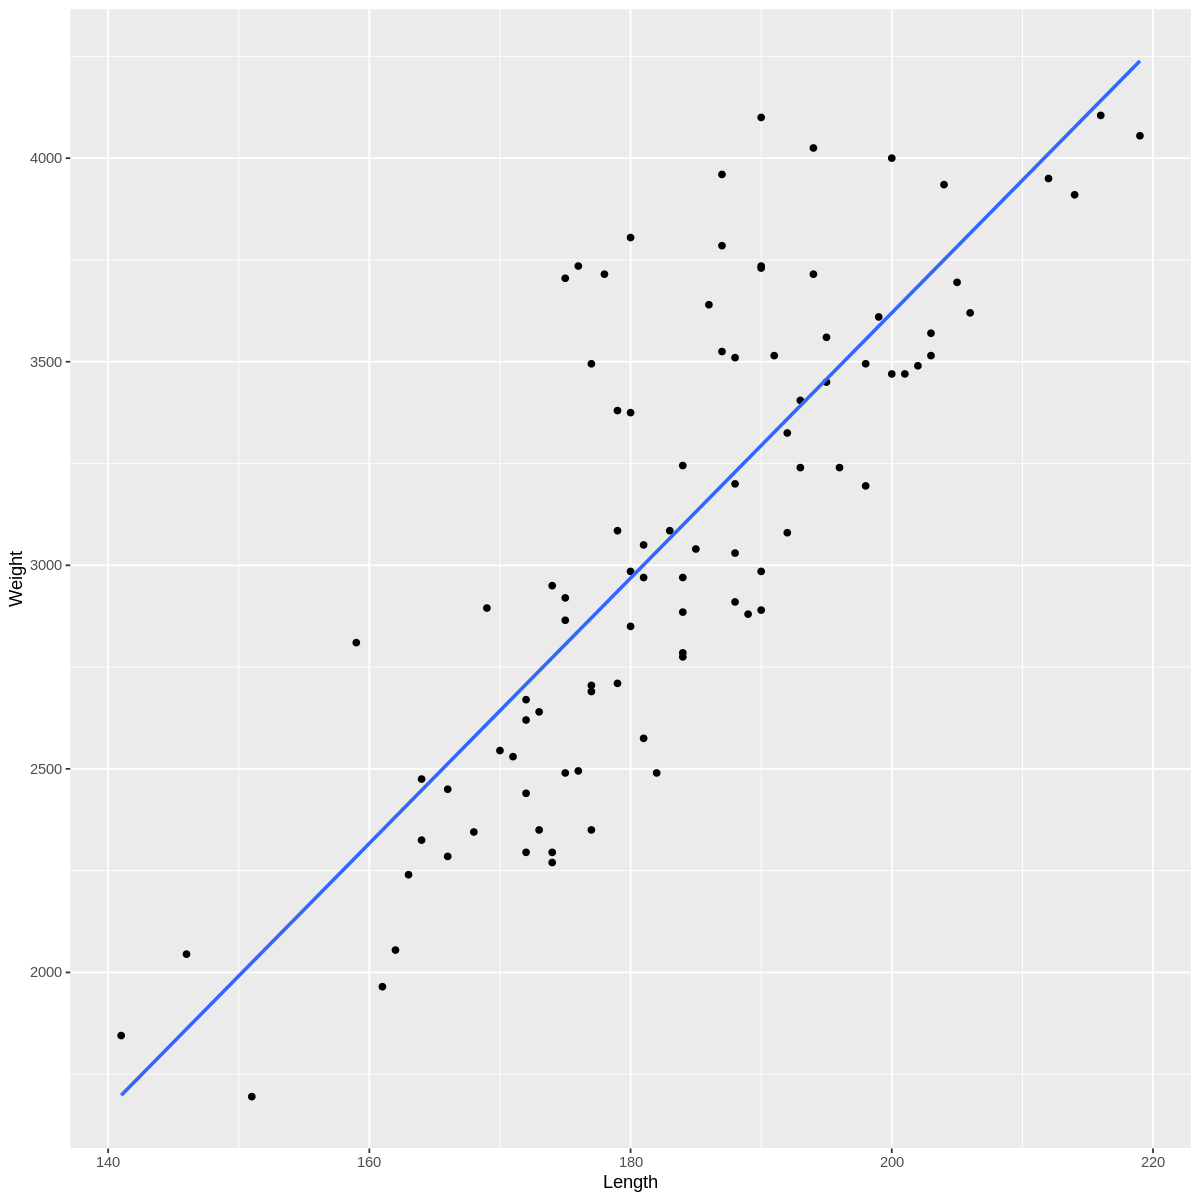

In [ ]:
# you can also add the fit model in your ggplot to show both the line fitted and uncertainty around the fitted line
ggplot(aes(Length, Weight), data=Cars93) + 
  geom_point() + 
  geom_smooth(method = 'lm',se=FALSE) # fits line without standard error shading - try deleting "se=FALSE"

## Inference

The coefficients table tells us that the effect of `Width` on `Weight` is statistically significant (the three stars next to each coefficient row in the output table). We can use the `coef` function to extract the estimated regression coefficients.

In [ ]:
# Just grab the regression coefficients themselves
coef(lm.fit)[1]

coef(lm.fit)[2]

(Intercept) 
  -2894.297

Length 
32.57129

These are the estimated $\hat{\beta_0}$ and $\hat{\beta_1}$ values. We can also easily estimate the confidence intervals on the coefficients from the model using the `confint` function.

In [ ]:
# In order to estimate the confidence interval on the regression coefficients we will use confit
# help("confint") # uncomment to see information on this function
print(confint(lm.fit))

                  2.5 %      97.5 %
(Intercept) -3808.77815 -1979.81606
Length         27.59531    37.54727


Does the 95% confidence interval for the `Width` coefficient contain zero? 

Do you accept or reject the null hypothesis that the width of a car associates with its weight?

## Prediction

Along with inferring the effect of `Width` on `Weight`, we can also use the model that we just trained to *predict* a car's weight for specific weight values. For this we will use the `predict` function.

In [ ]:
# We want to predict car weight at specific lstat levels
# help("predict") # Uncomment to see how the function works

# Here we will predict what the weight would be if the width for the car is 165, 180, or 195 inches.

length_input_values = data.frame(Length=c(165,180,195)) #specific SES values that you want a prediction for 
prediction_table = data.frame(predict(lm.fit, length_input_values, interval = 'confidence'))  #calling the predict function 

pred_input_table = cbind(length_input_values, prediction_table) #bind the input and prediction dataframes by column 

colnames(pred_input_table) = c('length_input','predicted fit','lower_CI_bound', 'upper_CI_bound') #use informative column names 
round(pred_input_table,2) #display rounded values

length_input predicted fit lower_CI_bound upper_CI_bound
1 165          2479.97       2364.08        2595.85       
2 180          2968.54       2894.53        3042.54       
3 195          3457.10       3364.00        3550.21

The predicted `Weight` values for each of the three `Length` values are returned, along with the lower and upper bounds of the 95% confidence interval of those predictions (i.e., we are 95% confident that the real value rests between those two bounds). For example, when `length`=180, we are 95% confident that the car's weight will be between 2894.53 lbs and 3042.54 lbs.

## Plotting

So far in this lab we have:

1. Estimated a model.
2. Inferred the estimated effect ($\hat{\beta}$) of a predictor (`Width`) on a response variable (`Weight`).
3. Generated predictions using this model.

Now let's learn some tools for visualizing the effects.

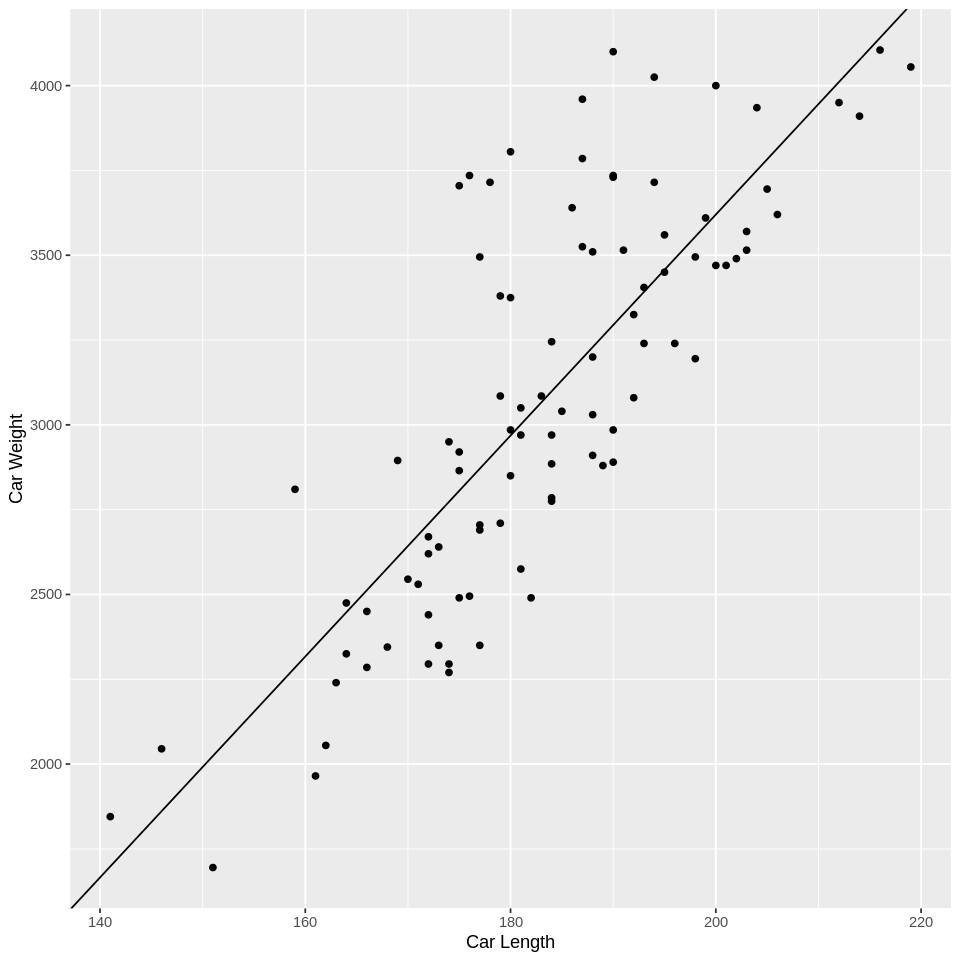

In [ ]:
# help("abline") # Uncomment to see how the function works
# abline(lm.fit)

ggplot(aes(`Length`, `Weight`), data=Cars93) + 
  geom_point() + 
  geom_abline(intercept = coef(lm.fit)[1], slope = coef(lm.fit)[2]) + # adds a line that shows the model's fit
  xlab('Car Length') + ylab('Car Weight') 

If you want a comprehensive visualization of the model, you can apply the base R plot command to the _lm.fit_ model object. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



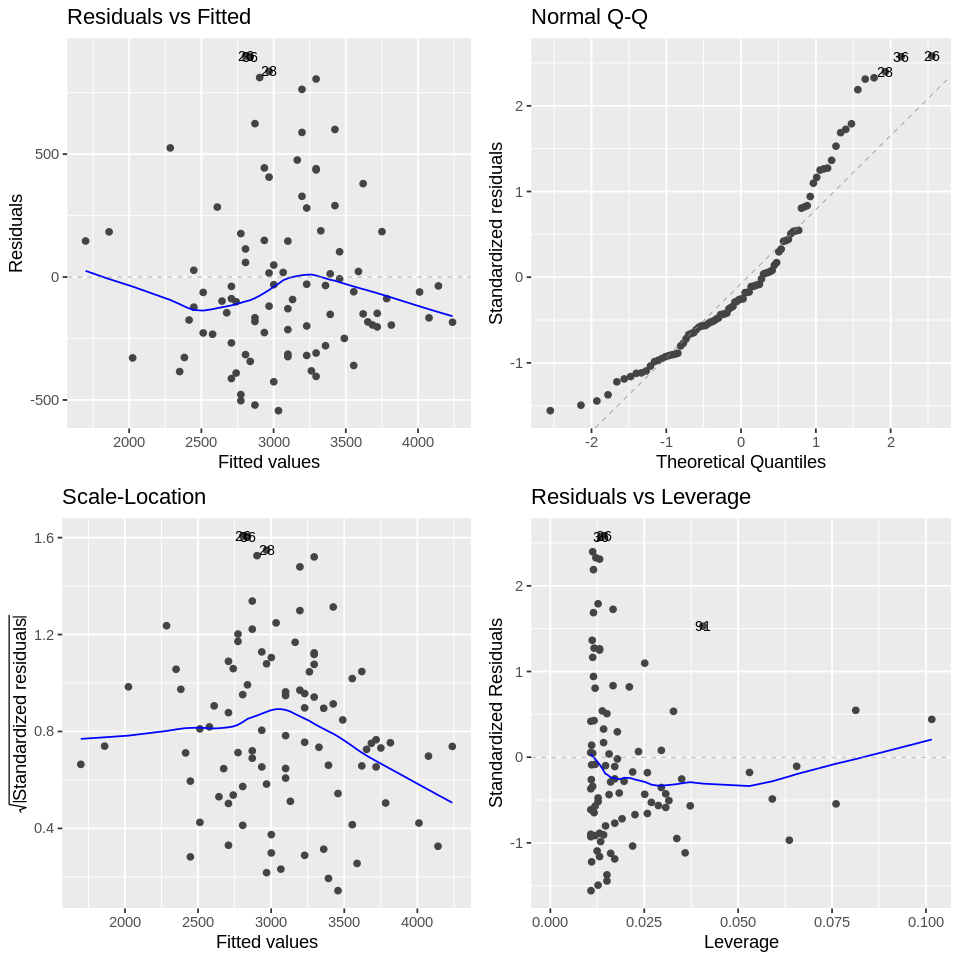

In [ ]:
install.packages("ggfortify")
library(ggfortify) #load a ggplot library that can plot model diagnostics  

suppressWarnings(
  autoplot(lm.fit, label.size = 3)
  )
# ( ^ note: I just suppressed a warning about an old version of a command that ggfortify uses - you don't need to worry about it)

Notice we get four plots that reveal different aspects of the model.

1. **Residuals vs. Fitted values:** We are looking for a generally flat line here, which would indicate a strictly linear data set.

2. **Q-Q Plot:** This is on the residuals and is used to validate your assumption that $Y$ is normally distributed. Note that the residuals are normalized to be standard normal (i.e., z-score transformed).

3. **Scale-location:** This is similar to the first plot, but the residuals are rescaled to be positive. This helps you to see if any non-linearities in the model are driven by tails in the residual distribution.

4. **Residuals vs. Leverage:** Here we apply the leverage statistic to see if there are any high-leverage values that are driving the model fits. Remember, you want to look for clusters of extreme points in the x-dimension here.

If you want to explore these values in more detail, I suggest getting comfortable with the `residuals`, `rstudent`, and `hatvalues` functions.

---
# Regression with multiple predictors

<br>
In the example above we fit a model where p = 1. 

$$ Y_{medv} = \hat{\beta_0} + \hat{\beta_1}X_{lstat} + \epsilon $$

Now let us explore the case where p > 1.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



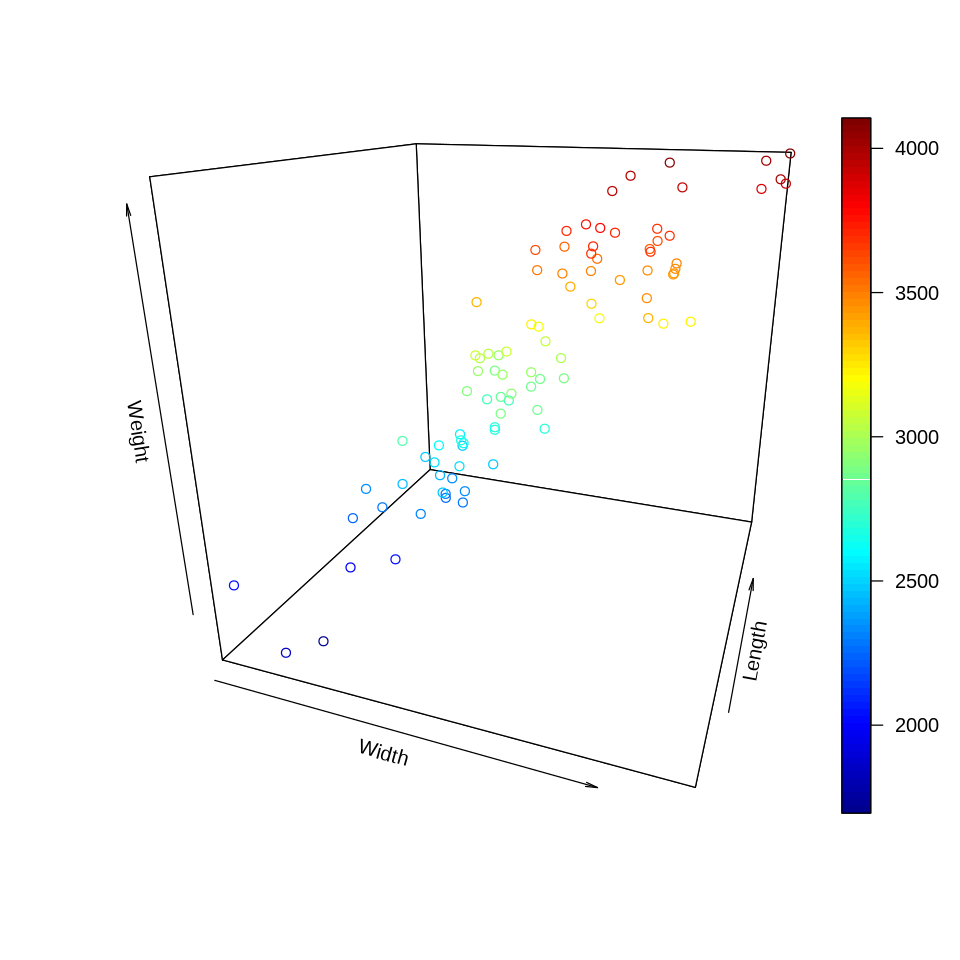

In [ ]:
# Let's plot some relationships first.
#install.packages("plot3D") # Uncomment if this is not installed

library(plot3D) # note - this is outside of the ggplot2 package
# Let's look at the relationship between Length AND Width on car weight

scatter3D(Cars93$Width, Cars93$Length, Cars93$Weight, phi=20, theta=20, xlab="Width", ylab="Length",zlab="Weight")
#phi controls tilt and theta controls angle

Interpeting the 3 dimensional scatterplot is the same as interpreting the 2 dimensional plot we showed above. You want a "football" shaped clustering where changes in `Weight` follow changes in the other two variables. So here, as the width and length of the car increase, the weight of the car increases too.


So it looks like adding `Width` seems to also explain `Weight`. We can confirm this by adding `Width` as a predictor in our model.

In [ ]:
lm.fit = lm(Weight~Width+Length, data=Cars93)
summary(lm.fit)


Call:
lm(formula = Weight ~ Width + Length, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-546.05 -194.89  -45.85  189.58  579.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5999.519    540.622 -11.097  < 2e-16 ***
Width         102.156     13.281   7.692 1.75e-11 ***
Length         10.836      3.437   3.153   0.0022 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274 on 90 degrees of freedom
Multiple R-squared:  0.7889,	Adjusted R-squared:  0.7842 
F-statistic: 168.1 on 2 and 90 DF,  p-value: < 2.2e-16


Notice that $r^2$ and $RSE$  improve a bit when we add `Width`, compared with the previous 1-parameter model.

Let's say we wanted to estimate the _full model_ (i.e., use all the numeric variables in the `Cars93` data set to predict `Weight`). If you use the "." symbol in the `lm()` function call, it tells R to use all variables _but_ the one being predicted.

In [ ]:
num_cols <- unlist(lapply(Cars93, is.numeric)) # Find just the numeric columns
lm.fit=lm(Weight~., data=Cars93[,num_cols])
summary(lm.fit)


Call:
lm(formula = Weight ~ ., data = Cars93[, num_cols])

Residuals:
     Min       1Q   Median       3Q      Max 
-220.402  -70.076   -4.002   69.825  222.764 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         140.05133  658.01561   0.213  0.83213    
Min.Price           165.31369  266.93918   0.619  0.53792    
Price              -324.39700  532.71044  -0.609  0.54471    
Max.Price           161.71716  266.15830   0.608  0.54560    
MPG.city              8.59419    9.31530   0.923  0.35969    
MPG.highway         -20.22139    9.05965  -2.232  0.02912 *  
EngineSize          -54.32469   59.99456  -0.905  0.36860    
Horsepower            4.32739    0.90113   4.802 9.82e-06 ***
RPM                  -0.11785    0.05006  -2.354  0.02165 *  
Rev.per.mile         -0.11059    0.05473  -2.021  0.04751 *  
Fuel.tank.capacity   31.58016   11.17775   2.825  0.00629 ** 
Passengers          -12.18737   33.37579  -0.365  0.71620    
Length          

Let's just keep playing with the ways that you can run and query the model object. First, let's say you want to exclude some of the non-significant variables from the model. According to the coefficients table above, `EngineSize` and `Passengers` are not significant predictors when we run the full model. So we can remove them in two ways. First we can just train a new model with these variables excluded.

In [ ]:
# Excluding a variable from the model: age, indus
lm.fit_new = lm(Weight~.-EngineSize -Passengers, data=Cars93[,num_cols]) #you can exclude a variable by placing a '-' sign in front of it
summary(lm.fit_new)


Call:
lm(formula = Weight ~ . - EngineSize - Passengers, data = Cars93[, 
    num_cols])

Residuals:
     Min       1Q   Median       3Q      Max 
-237.809  -68.733   -1.621   68.685  227.473 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         147.72555  651.85150   0.227  0.82142    
Min.Price            75.96356  249.11030   0.305  0.76137    
Price              -147.95766  497.76892  -0.297  0.76722    
Max.Price            74.20151  248.91613   0.298  0.76656    
MPG.city              7.03821    9.10838   0.773  0.44245    
MPG.highway         -19.32891    8.75157  -2.209  0.03068 *  
Horsepower            3.86820    0.69431   5.571 5.02e-07 ***
RPM                  -0.08711    0.03597  -2.422  0.01819 *  
Rev.per.mile         -0.09151    0.05010  -1.826  0.07232 .  
Fuel.tank.capacity   29.29317   10.63264   2.755  0.00758 ** 
Length                5.43428    2.61187   2.081  0.04135 *  
Wheelbase            15.52055    6.25976   2.47

Alternatively we can just update the _lm.fit_ model that we estimated above by extracting those variables using the _update_ function.

In [ ]:
# Or just update the existing model
lm.fit_new=update(lm.fit, ~.-EngineSize -Passengers)
summary(lm.fit_new)


Call:
lm(formula = Weight ~ Width + Length, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-546.05 -194.89  -45.85  189.58  579.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5999.519    540.622 -11.097  < 2e-16 ***
Width         102.156     13.281   7.692 1.75e-11 ***
Length         10.836      3.437   3.153   0.0022 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274 on 90 degrees of freedom
Multiple R-squared:  0.7889,	Adjusted R-squared:  0.7842 
F-statistic: 168.1 on 2 and 90 DF,  p-value: < 2.2e-16


Either way it's pretty easy to swap terms in and out of the model in R.

---
# Working with categorical (qualitative) predictors

<br>
So far we've been playing mostly with quantitative predictors. Let's now play with some qualitative predictors.

For this we will use a different data set (the [CAR](https://cran.r-project.org/web/packages/car/car.pdf) package).

In [ ]:
# First we will want to clear the workspace
rm(list=ls())

# Next load the car package for this
install.packages("car") #Uncomment if you haven't already installed the package
library(ISLR)

# Look at the Carseats dataset
# help(Carseats) # Uncomment to view documentation
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

This data set consists of a data frame with 400 observations on the following 11 variables.

* **Sales:**  Unit sales (in thousands) at each location

* **CompPrice:** Price charged by competitor at each location

* **Income:**  Community income level (in thousands of dollars)

* **Advertising:** Local advertising budget for company at each location (in thousands of dollars)

* **Population:** Population size in region (in thousands)

* **Price:**  Price company charges for car seats at each site

* **ShelveLoc:** A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* **Age:** Average age of the local population

* **Education:** Education level at each location

* **Urban:**  A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* **US:** A factor with levels No and Yes to indicate whether the store is in the US or not


Let's model this first, but we will want to pay special attention to the _ShelveLoc_ variable.

In [ ]:
# Now let us fit Sales with some interaction terms
lm.fit = lm(Sales~.+Income:Advertising+Price:Age, data=Carseats) #here we are using all individual predictors + interactions between income & advertising and price & age.
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

Let's look closer at the _ShelveLoc_ variable. Notice that the original variable had 3 levels. But R automatically recoded this into 2 binary variables: _ShelveLocGood_ and _ShelveLocMedium_.

You can see how r sets up this binarization using the _contrasts_ function.

In [ ]:
# attach(Carseats)
contrasts(Carseats$ShelveLoc)
#here, bad is when good and medium are 0 
#good is when good = 1 and medium = 0 
#medium is when good = 0 and medium = 1

Good Medium
Bad    0    0     
Good   1    0     
Medium 0    1

Thus the effect for Bad shelving locations is included in the intercept term of the model. In this model, _ShelveLoc_ is the only categorical variable that has more than 2 levels. 
<br><br>
But remember -- things get complicated if you have multiple categorical variables that have more than two terms. As we discussed in lecture, in those cases the intercept no longer corresponds to a single level of a categorical variable. So watch carefully how R redefines categorical variables.

Next up, we will talk about linear mixed effects models and show how to implement those in R! 

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, and Amy Sentis.*